In [1]:
#%load_ext google.cloud.bigquery

In [1]:
import google.cloud.bigquery as bq

In [2]:
client = bq.Client.from_service_account_json(r"C:\Users\HYZ7C\Desktop\Amazon Kaggle\Amazon Fine Food Reviews\service account\composite-cable-267902-437712ebc1d4.json")

In [7]:
df = client.query("""
    SELECT *
    FROM 
    `composite-cable-267902.fine_food.Reviews` 
    """).to_dataframe()

In [8]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,339985,B000EYPNCC,A15YMPC9C9WM6P,*,0,0,5,1349568000,Amazon purchase Sensible Foods Apple Harvest,I have to say that this organic apple snack is...
1,196369,B004LLD27M,AYPR5ZBNC7B4,.,0,0,5,1333497600,Great for my overweight weiner dog,"Before this, I'd buy my 11 year old dachshund ..."
2,45487,B000XBCBW6,ATNZ6ZION5HI1,.,0,0,5,1196035200,Chicago's secret weapon.,"It's amazing that Bell isn't more well-known, ..."
3,563804,B007JFMH8M,ARXXVTC92XKHU,.,0,0,5,1341792000,cookies!,"these cookies are really good. i love oatmeal,..."
4,65448,B001EQ55ZO,ATNZ6ZION5HI1,.,0,0,5,1214956800,Dry fresh and tastey,These nuts seem fresher than most other brands...


In [41]:
df_UseravgScore = df.groupby('UserId')['Score'].mean().to_frame().reset_index()

In [42]:
df_UseravgScore.describe()

,Score
count,256059.000000
mean,4.168984
std,1.313261
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [43]:
df_UseravgScore.head()

,UserId,Score
0,#oc-R103C0QSV1DF5E,5.0
1,#oc-R109MU5OBBZ59U,5.0
2,#oc-R10LFEMQEW6QGZ,5.0
3,#oc-R10LT57ZGIB140,3.0
4,#oc-R10UA029WVWIUI,1.0


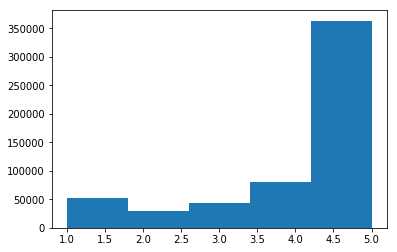

In [46]:
import matplotlib.pyplot as plt
ax = plt.hist(df['Score'], bins=5)

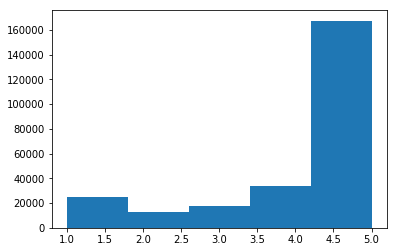

In [58]:
#[df_UseravgScore['Score']]
ax2 = plt.hist(df_UseravgScore.Score, bins = 5)

In [59]:
df_lowScore = df_UseravgScore[df_UseravgScore['Score'] < 4.0]

In [60]:
df_lowScore.describe()

,Score
count,59912.000000
mean,2.022895
std,0.964629
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.977273


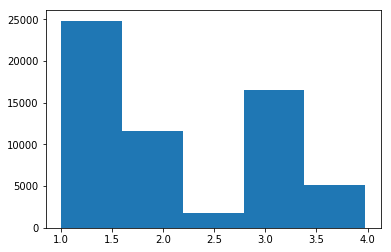

In [62]:
ax3 = plt.hist(df_lowScore.Score, bins = 5)

In [63]:
df.Time.head()

0    1349568000
1    1333497600
2    1196035200
3    1341792000
4    1214956800
Name: Time, dtype: int64

In [64]:
df_formattedTime = client.query(
"""
SELECT
    Id,
    ProductId,
    UserId,
    Score, 
    DATE(TIMESTAMP_SECONDS(Time)) as Date
FROM `composite-cable-267902.fine_food.Reviews`
""").to_dataframe()

In [65]:
import seaborn as sns

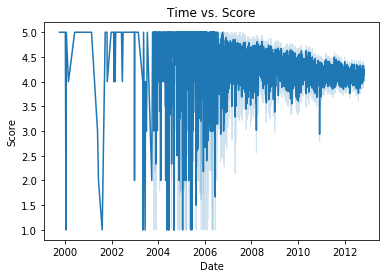

In [66]:
ScoreVsTime_chart = sns.lineplot(x="Date",
                         y="Score", 
                         data=df_formattedTime
                         ).set_title('Time vs. Score')
plt.show()